In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/rakes/Downloads/advertising1.csv')

In [4]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


AIM-Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In [5]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Observation
Avg Expense is highest on TV(147)

Avg Expense is lowest is on Radio

Max sale is 27 and min sale is 1.6

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no null values in the given dataset

In [10]:
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


In [ ]:
Observation-There is no duplicate value in the dataset

<Axes: >

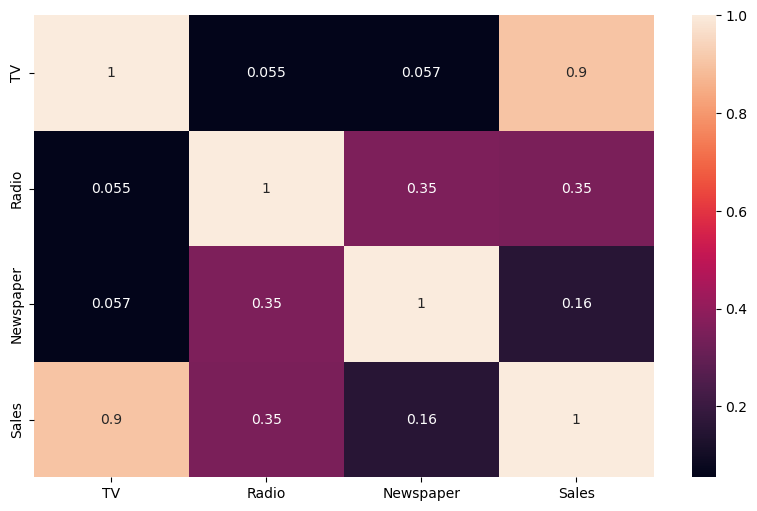

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

### Sales is highly correlated with TV

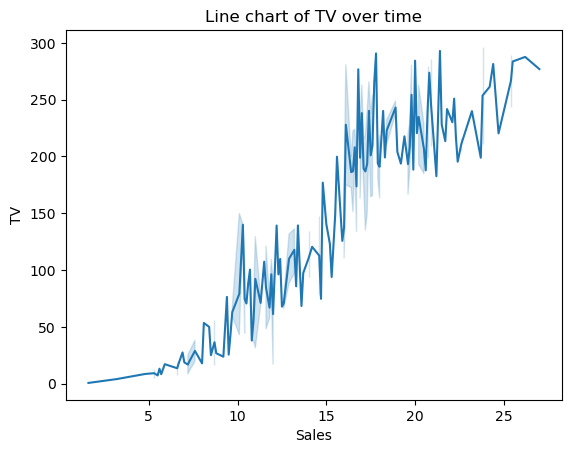

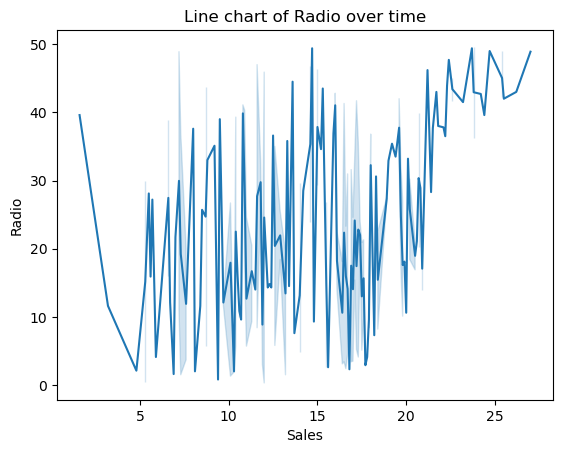

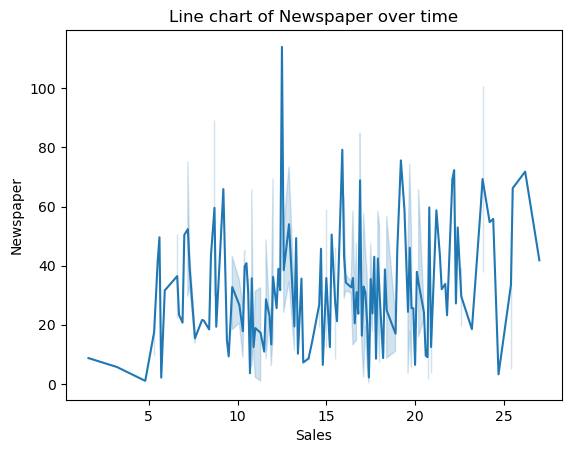

In [21]:
for col in df.columns:
    if col not in ('Sales'):
        
        sns.lineplot(y=col,x='Sales',data=df)
        plt.xlabel('Sales')
        plt.ylabel(col)
        plt.title(f'Line chart of {col} over time')
        plt.show()

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


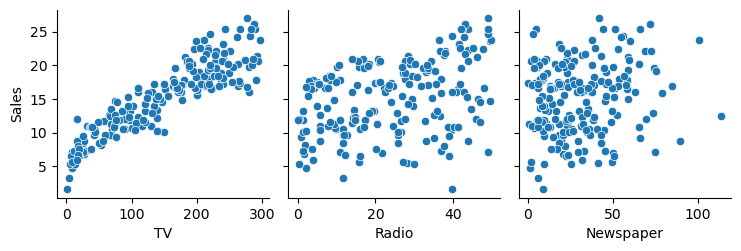

In [23]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

So from the avove 2 plot it is cleared that when Advertising cost on Tv increases the sales increases as well as there is a positive correlation between Tv and Sales but it's not in case of Newspaper and Radio because the correlation of these 2 entity wity Sales is near to Zero

<Axes: xlabel='TV', ylabel='Count'>

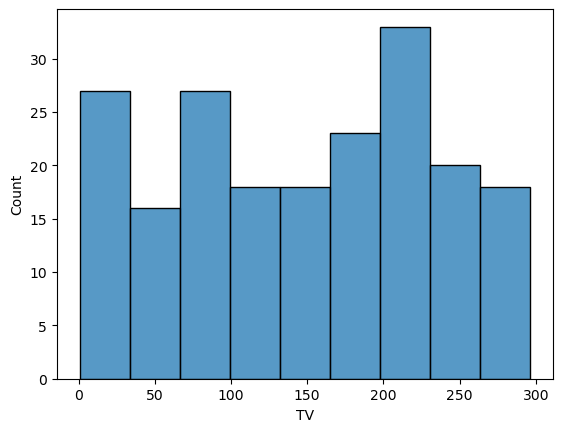

In [27]:
sns.histplot(data=df,x='TV')

<Axes: xlabel='Radio', ylabel='Count'>

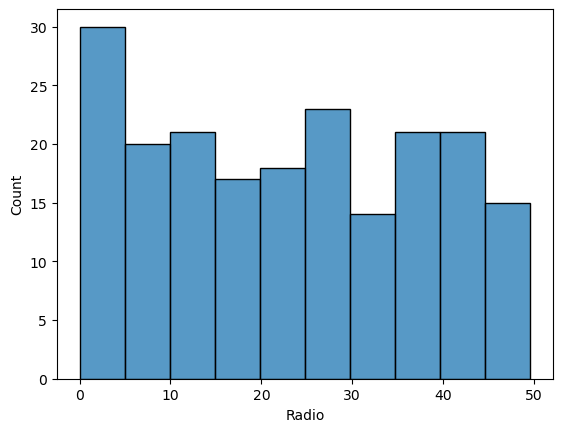

In [29]:
sns.histplot(data=df,x='Radio',bins=10)

<Axes: xlabel='Newspaper', ylabel='Count'>

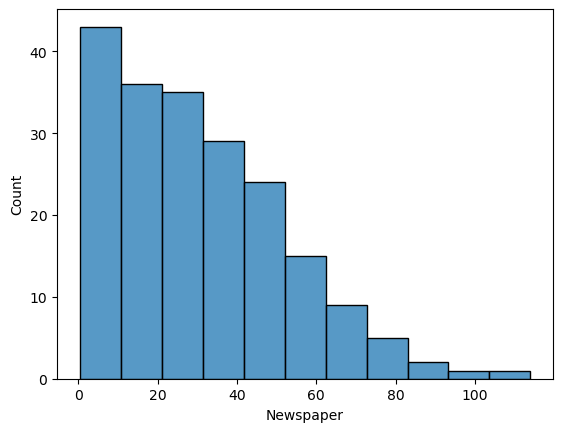

In [30]:
sns.histplot(data=df,x='Newspaper')

### Training the model using Linear Rgression

In [5]:
x=df['TV']
y=df['Sales']

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
print(x_train)

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
       ...  
67     139.3
192     17.2
117     76.4
47     239.9
172     19.6
Name: TV, Length: 140, dtype: float64


In [34]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [31]:
print(x_test.head())

18      69.2
170     50.0
107     90.4
98     289.7
177    170.2
Name: TV, dtype: float64


In [12]:
print(y_test.head())

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
Name: Sales, dtype: float64


In [36]:
print(x_train,x_test,y_train,y_test)

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
       ...  
67     139.3
192     17.2
117     76.4
47     239.9
172     19.6
Name: TV, Length: 140, dtype: float64 18      69.2
170     50.0
107     90.4
98     289.7
177    170.2
182     56.2
5        8.7
146    240.1
12      23.8
152    197.6
61     261.3
125     87.2
180    156.6
154    187.8
80      76.4
7      120.2
33     265.6
130      0.7
37      74.7
74     213.4
183    287.6
145    140.3
45     175.1
159    131.7
60      53.5
123    123.1
179    165.6
185    205.0
122    224.0
44      25.1
16      67.8
55     198.9
150    280.7
111    241.7
22      13.2
189     18.7
129     59.6
4      180.8
83      68.4
106     25.0
134     36.9
66      31.5
26     142.9
113    209.6
168    215.4
63     102.7
8        8.6
75      16.9
118    125.7
143    104.6
71     109.8
124    229.5
184    253.8
97     184.9
149     44.7
24      62.3
30     292.9
160    172.5
40     202.5
56       7.3
Name: TV, dtype: float64 131    17.7
96

In [38]:
#Adding a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

#Fit the regression line using OLS
lr=sm.OLS(y_train,x_train_sm).fit()

In [17]:
#Intercept and slope of the regression line fitted
lr.params

const    7.143822
TV       0.054732
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           5.56e-51
Time:                        14:21:05   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

In [13]:
#Predict y values corresponding to x_test using the [erdict attribute of the fitted regression line
x_test_sm=sm.add_constant(x_test)
y_pred=lr.predict(x_test_sm)
print(y_pred.head())

18     10.931276
170     9.880422
107    12.091594
98     22.999681
177    16.459208
dtype: float64


In [14]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.3652633048811704

In [15]:
r_squared=r2_score(y_test,y_pred)
print('The R-squared for the model is:',r_squared)

The R-squared for the model is: 0.8150168765722069


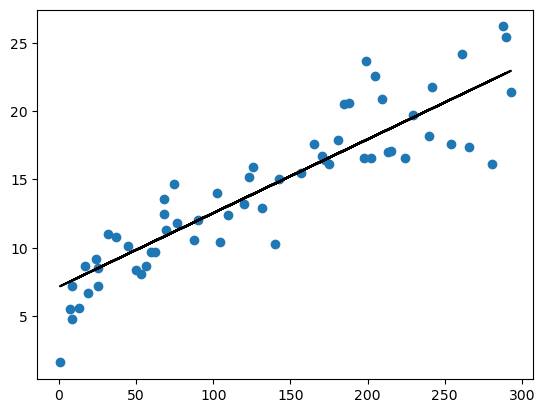

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.14+0.054*x_test,'black')
plt.show()